In [1]:
! pip install chart_studio
! pip install cufflinks 
! pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# ♦ Part 1

In [3]:
df = pd.read_csv(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\data_set\cleaned data for anaysis\cleaned_zomato.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43541 entries, 0 to 43540
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 43541 non-null  int64  
 1   Unnamed: 0                   43541 non-null  int64  
 2   url                          43541 non-null  object 
 3   address                      43541 non-null  object 
 4   name                         43541 non-null  object 
 5   online_order                 43541 non-null  object 
 6   book_table                   43541 non-null  object 
 7   rate                         43541 non-null  float64
 8   votes                        43541 non-null  int64  
 9   phone                        42952 non-null  object 
 10  location                     43541 non-null  object 
 11  rest_type                    43541 non-null  object 
 12  dish_liked                   23406 non-null  object 
 13  cuisines        

In [5]:
df['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500],
      dtype=int64)

In [6]:
df['rate'].dtype, df['approx_cost(for two people)'].dtype

(dtype('float64'), dtype('int64'))

## Q1) Total Restaurants that have rating > 4 and are in budget ?

In [7]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape

(2436, 19)

In [10]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

# so we have 372 restaurants which are affordable and also has good rating.

372

In [11]:
df_new = df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]
df_new.head()

,Unnamed: 0.1,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
10,10,10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
12,12,12,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
34,34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
51,51,51,https://www.zomato.com/bangalore/shree-cool-po...,"1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...",Shree Cool Point,Yes,No,4.1,28,+91 9900617124,Vijay Nagar,Quick Bites,NaN,"Fast Food, Street Food, Beverages",150,"[('Rated 5.0', 'RATED\n Who would say no to s...","['Vegetable Sandwich', 'Vegetable Sandwich wit...",Delivery,Banashankari
52,52,52,https://www.zomato.com/bangalore/corner-house-...,"808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...",Corner House Ice Cream,No,No,4.3,345,080 26713965\r\n+91 9845444155,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400,"[('Rated 3.0', ""RATED\n Always a fan of corne...",[],Delivery,Banashankari


## Q2) Total various affordable hotels at all locations of Bengalore ?

In [12]:
location = []
total = []

for loc, location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [13]:
location_df = pd.DataFrame(zip(location, total))
location_df.head()

,0,1
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


In [14]:
location_df.columns = ['location', 'restaurant']

In [15]:
location_df.head()

,location,restaurant
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


## Q3) Finding Best budget Restaurants in any location ?

In [16]:
def return_budget(location, restaurant):
    budget = df[(df['approx_cost(for two people)']<=500) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant)]
    return (budget['name'].unique())

In [17]:
return_budget('BTM', 'Quick Bites')

# These are best budget restaurant in BTM

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Hungry Lee', 'Kannur Food Point',
       "Domino's Pizza", 'Kesar Sweet Shop and Fast Food', 'KFC',
       'Hari Super Sandwich', 'The Biriyani Pedia', 'World Of Asia'],
      dtype=object)

## Q4) Which are the foodie areas ?

<AxesSubplot:xlabel='location'>

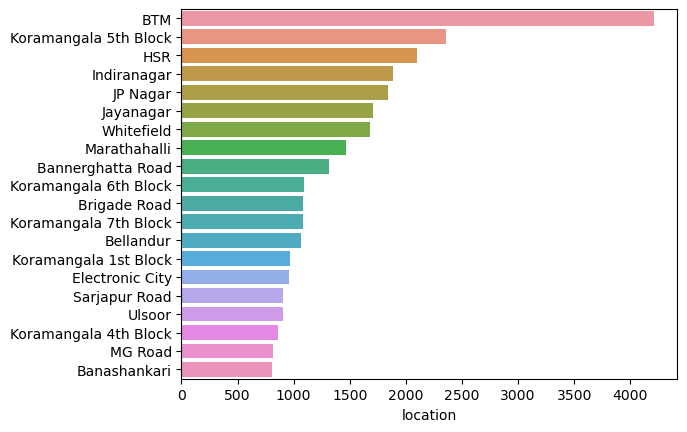

In [18]:
restaurant_location = df['location'].value_counts()[0:20]
sns.barplot(x = restaurant_location, y = restaurant_location.index)

# save file in system as image
Image(fig.to_image(format='png',width=1280,height=720,engine='kaleido',scale=2))

# In this graph we can see the area which have majority of restaurant

# ♦ Part 2

## • Geographical analysis

In [16]:
df = pd.read_csv(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\data_set\cleaned data for anaysis\cleaned_zomato.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
! pip install geopy

## Q6) Find Latitudes and Longitudes for each of the location of Bengalore

In [18]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [19]:
from geopy.geocoders import Nominatim

In [20]:
geolocator = Nominatim(user_agent ='app')

In [21]:
# Find latitude and Longitude of the locations

lat_lon = []
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

In [22]:
locations['geo_loc'] = lat_lon

locations.head()

# This is latitude and Longitude of the location
# This data will be used to plot maps

,Name,geo_loc
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9467026, 77.5300705)"
3,Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [23]:
locations.shape

(92, 2)

In [24]:
# Here we count total number of location where restaurants are located

Rest_location = pd.DataFrame(df['location'].value_counts().reset_index())
Rest_location.head()

,index,location
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [25]:
# Now preprocess above dataframe

Rest_location.columns=['Name','count']
Rest_location.head()

,Name,count
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [26]:
# After creating two different dataframe we have to combine them.

Restaurant_locations = Rest_location.merge(locations, on = 'Name', how = 'left').dropna()
Restaurant_locations.head()

# Here we get dataframe of:
# Name of restaurants, count of number of those restaurants according to geographical location.

,Name,count,geo_loc
0,BTM,4210,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,"(12.9348429, 77.6189768)"
2,HSR,2102,"(18.1475, 41.538889)"
3,Indiranagar,1889,"(12.9732913, 77.6404672)"
4,JP Nagar,1842,"(12.2655944, 76.6465404)"


In [27]:
# Convert all the data from the column 'geo_loc' in the form of array.

np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.9521804, 77.6041899), (12.9390255, 77.6238477),
       (-34.0881284, 18.4585622), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5763076, -74.1270894),
       (34.0702921, 74.8090203), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7131693, -74.0092922),
       (13.0384423, 77.5647533), (13.0093455, 77.6377094),
       (40.7652844, -76.373824), (12.9882338, 77.554883),
       (13.0141618, 77.65

## Q7) Generate Basemap of Bengalore

In [28]:
# We unzip the column

lat,lon = zip(*np.array(Restaurant_locations['geo_loc']))

In [29]:
type(lat), type(lon)

(tuple, tuple)

In [30]:
# Here we put value of latitude into newly created column lat
# and value longitude into newly created column lon

Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

Restaurant_locations.head()

,Name,count,geo_loc,lat,lon
0,BTM,4210,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,"(12.9348429, 77.6189768)",12.934843,77.618977
2,HSR,2102,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1889,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1842,"(12.2655944, 76.6465404)",12.265594,76.646540


In [31]:
# Now Removing column name geo_loc

Restaurant_locations.drop('geo_loc', axis = 1, inplace = True)
Restaurant_locations.head()

,Name,count,lat,lon
0,BTM,4210,45.954851,-112.496595
1,Koramangala 5th Block,2358,12.934843,77.618977
2,HSR,2102,18.147500,41.538889
3,Indiranagar,1889,12.973291,77.640467
4,JP Nagar,1842,12.265594,76.646540


In [32]:
! pip install folium

In [33]:
# import heatmap
import folium
from folium.plugins import HeatMap

# image library
from IPython.display import Image

In [34]:
def generatebasemap(default_location = [12.97, 77.59], default_zoom_start = 12):
    basemap = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return basemap

In [35]:
basemap = generatebasemap()
basemap

base.save(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\base_empty_map.html")

Image(filename = r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\base_empty_map.png")

## Q8) Heatmap of Restaurant

In [34]:
def generatebasemap(default_location = [12.97, 77.59], default_zoom_start = 12):
    basemap = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return basemap

In [36]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(), zoom = 20, radius = 15).add_to(basemap)

basemap

base.save(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\heatmap_allrestaurant_Banglore.html")

Image(filename = r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\heatmap_allrestaurant_Banglore.png")

# ♦ Analyzing Most Popular Cuisines

## Q9) Heatmap of North Indian Restaurant

In [37]:
df.head()

,Unnamed: 0.1,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [38]:
df2 = df[df['cuisines'] == 'North Indian']
df2.head()

,Unnamed: 0.1,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,50,50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
86,86,87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
90,90,94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [39]:
north_indian = df2.groupby(['location'], as_index = False)['url'].agg('count')

north_indian.head()

,location,url
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [40]:
north_indian.columns=['Name','count']
north_indian.head()

,Name,count
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [41]:
north_india = north_indian.merge(locations, on = 'Name', how = 'left').dropna()
north_india.head(10)

,Name,count,geo_loc
0,BTM,262,"(45.95485055, -112.49659530324134)"
1,Banashankari,35,"(15.8876779, 75.7046777)"
2,Banaswadi,5,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,60,"(12.9521804, 77.6041899)"
4,Basavanagudi,17,"(12.9417261, 77.5755021)"
5,Basaveshwara Nagar,1,"(12.2949402, 76.6160796)"
6,Bellandur,131,"(12.93103185, 77.6782471)"
7,Bommanahalli,6,"(12.9089453, 77.6239038)"
8,Brigade Road,39,"(-34.0881284, 18.4585622)"
9,Brookefield,42,"(33.5935063, -79.0345627)"


In [42]:
# unzip the geo_loc column

north_india['lat'], north_india['lon'] = zip(*north_india['geo_loc'].values)

north_india.head()

,Name,count,geo_loc,lat,lon
0,BTM,262,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,35,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,5,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,60,"(12.9521804, 77.6041899)",12.952180,77.604190
4,Basavanagudi,17,"(12.9417261, 77.5755021)",12.941726,77.575502


In [43]:
# Now drop geo_loc column

north_india.drop('geo_loc', axis = 1, inplace = True)

In [44]:
north_india.head()

,Name,count,lat,lon
0,BTM,262,45.954851,-112.496595
1,Banashankari,35,15.887678,75.704678
2,Banaswadi,5,13.014162,77.651854
3,Bannerghatta Road,60,12.952180,77.604190
4,Basavanagudi,17,12.941726,77.575502


In [34]:
def generatebasemap(default_location = [12.97, 77.59], default_zoom_start = 12):
    basemap = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return basemap

In [45]:
# Heat map for north_indian restaurant

basemap = generatebasemap()
HeatMap(north_india[['lat','lon','count']].values.tolist(), zoom = 20, radius = 15).add_to(basemap)

basemap

base.save(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\heatmap_NIres_Bangalore.html")

Image(filename = r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\heatmap_NIres_Bangalore.png")

## Q10) Which are the most popular casual dining Restaurant chains ?

In [46]:
df_1 = df.groupby(['rest_type', 'name']).agg('count')
df_1.head()

Unnamed: 0.1  Unnamed: 0  url  address  \
rest_type name                                                        
Bakery    7th Heaven                    2           2    2        2   
          A Little For Love             1           1    1        1   
          Adarsh Bakery                 2           2    2        2   
          Adi's Cake N Cafe             2           2    2        2   
          Albert Bakery                 1           1    1        1   

                             online_order  book_table  rate  votes  phone  \
rest_type name                                                              
Bakery    7th Heaven                    2           2     2      2      2   
          A Little For Love             1           1     1      1      1   
          Adarsh Bakery                 2           2     2      2      2   
          Adi's Cake N Cafe             2           2     2      2      2   
          Albert Bakery                 1           1     1      1      1   

                             location  dish_liked  cuisines  \
rest_type name                                                
Bakery    7th Heaven                2           0         2   
          A Little For Love         1           0         1   
          Adarsh Bakery             2           0         2   
          Adi's Cake N Cafe         2           0         2   
          Albert Bakery             1           1         1   

                             approx_cost(for two people)  reviews_list  \
rest_type name                                                           
Bakery    7th Heaven                                   2             2   
          A Little For Love                            1             1   
          Adarsh Bakery                                2             2   
          Adi's Cake N Cafe                            2             2   
          Albert Bakery                                1             1   

                             menu_item  listed_in(type)  listed_in(city)  
rest_type name                                                            
Bakery    7th Heaven                 2                2                2  
          A Little For Love          1                1                1  
          Adarsh Bakery              2                2                2  
          Adi's Cake N Cafe          2                2                2  
          Albert Bakery              1                1                1

In [47]:
df_1.sort_values(['url'], ascending = False)

Unnamed: 0.1  Unnamed: 0  url  \
rest_type           name                                                 
Cafe                Cafe Coffee Day                89          89   89   
Casual Dining, Cafe Onesta                         85          85   85   
Quick Bites         Five Star Chicken              67          67   67   
                    Domino's Pizza                 60          60   60   
                    McDonald's                     59          59   59   
...                                               ...         ...  ...   
                    New Students Corner             1           1    1   
Dessert Parlor      Mr Gola                         1           1    1   
Casual Dining       Parijatha Paradise              1           1    1   
                    Parijatha Fish Land             1           1    1   
Delivery            SaJuSo                          1           1    1   

                                         address  online_order  book_table  \
rest_type           name                                                     
Cafe                Cafe Coffee Day           89            89          89   
Casual Dining, Cafe Onesta                    85            85          85   
Quick Bites         Five Star Chicken         67            67          67   
                    Domino's Pizza            60            60          60   
                    McDonald's                59            59          59   
...                                          ...           ...         ...   
                    New Students Corner        1             1           1   
Dessert Parlor      Mr Gola                    1             1           1   
Casual Dining       Parijatha Paradise         1             1           1   
                    Parijatha Fish Land        1             1           1   
Delivery            SaJuSo                     1             1           1   

                                         rate  votes  phone  location  \
rest_type           name                                                
Cafe                Cafe Coffee Day        89     89     86        89   
Casual Dining, Cafe Onesta                 85     85     85        85   
Quick Bites         Five Star Chicken      67     67     62        67   
                    Domino's Pizza         60     60     60        60   
                    McDonald's             59     59     59        59   
...                                       ...    ...    ...       ...   
                    New Students Corner     1      1      1         1   
Dessert Parlor      Mr Gola                 1      1      1         1   
Casual Dining       Parijatha Paradise      1      1      1         1   
                    Parijatha Fish Land     1      1      1         1   
Delivery            SaJuSo                  1      1      1         1   

                                         dish_liked  cuisines  \
rest_type           name                                        
Cafe                Cafe Coffee Day              31        89   
Casual Dining, Cafe Onesta                       85        85   
Quick Bites         Five Star Chicken            10        67   
                    Domino's Pizza               55        60   
                    McDonald's                   57        59   
...                                             ...       ...   
                    New Students Corner           0         1   
Dessert Parlor      Mr Gola                       0         1   
Casual Dining       Parijatha Paradise            0         1   
                    Parijatha Fish Land           0         1   
Delivery            SaJuSo                        0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                         

In [48]:
df_1.sort_values(['url'], ascending = False).groupby(['rest_type'], as_index = False).apply(lambda x : x.sort_values(by = 'url', ascending = False))

Unnamed: 0.1  Unnamed: 0  \
   rest_type          name                                                   
0  Bakery             Just Bake                             44          44   
                      Warm Oven                             28          28   
                      INDULGE by InnerChef                  28          28   
                      Karachi Bakery                        26          26   
                      CakeZone                              21          21   
...                                                        ...         ...   
86 Takeaway, Delivery Agraharam Meal                         1           1   
                      Adyar Ananda Bhavan Sweets             1           1   
                      Faasos                                 1           1   
                      @North Parontha Hut                    1           1   
                      Lucky Singh & Co                       1           1   

                                                  url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                    

In [50]:
df_1.sort_values(['url'], ascending = False).groupby(['rest_type'], as_index = False).apply(lambda x : x.sort_values(by = 'url', ascending = False))['url'].reset_index()

,level_0,rest_type,name,url
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [52]:
dataset = df_1.sort_values(['url'], ascending = False).groupby(['rest_type'], as_index = False).apply(lambda x : x.sort_values(by = 'url', ascending = False))['url'].reset_index().rename(columns = {'url':'count'})
dataset.head()

,level_0,rest_type,name,count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21


In [53]:
casual = dataset[dataset['rest_type'] == 'Casual Dining']
casual

,level_0,rest_type,name,count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
...,...,...,...,...
2635,24,Casual Dining,Uppercut - Sheraton Grand Bengaluru Whitefield...,1
2636,24,Casual Dining,Utsav Restaurant,1
2637,24,Casual Dining,VMS Star Biriyani,1
2638,24,Casual Dining,Veruthe Oru Thattukada,1


# • conclusion:
    Empire Restaurant, Beijing Bites, Mani's Dum Biryani
    are the most popular casual dining restaurant chains in Bangluru